In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
zomato_data=pd.read_csv('zomato.csv',encoding="ISO-8859-1")
zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Question 1

## Question 1a

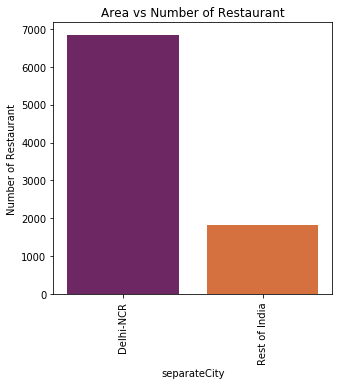

In [14]:
## Question 1a)
def separateCity(city):
    if city=='New Delhi' or city=='Ghaziabad' or city=='Faridabad' or city=='Noida':
        return "Delhi-NCR"
    else:
        return "Rest of India"
zomato_seperate_data=zomato_data[zomato_data['Country Code']==1].copy()
zomato_seperate_data['separateCity']=zomato_seperate_data['City'].apply(separateCity)
plt.subplots(figsize=(5,5))
sns.countplot(zomato_seperate_data['separateCity'],palette='inferno',order=zomato_seperate_data['separateCity'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Area vs Number of Restaurant')
plt.ylabel("Number of Restaurant")
plt.show()

## Question 1b

In [92]:
### Question 1b)
delhi_ncr_cuisine=set()
rest_of_india_cuisine=set()
for i in zomato_seperate_data[zomato_seperate_data['separateCity']=='Delhi-NCR']['Cuisines'].values:
    cuisine_list=i.split(',')
    for j in cuisine_list:
        delhi_ncr_cuisine.add(j.strip())
for i in zomato_seperate_data[zomato_seperate_data['separateCity']=='Rest of India']['Cuisines'].values:
    cuisine_list=i.split(',')
    for j in cuisine_list:
        rest_of_india_cuisine.add(j.strip())    
## Cuisine not present in Delhi NCR but present in rest of india
cuisine_not_present=list((x for x in rest_of_india_cuisine if x not in delhi_ncr_cuisine))
## Getting the list of cuisines actually present in Delhi NCR using Zomato API.
cuisines_name_id={}
import requests
user_key='3754f0440b3026cde542ed69af9f499a'
basic_api='https://developers.zomato.com/api/v2.1'
params={'city_id':1}
header={"User-agent": "curl/7.43.0",'Accept': 'application/json','user-key':user_key}
response=requests.get(basic_api+'/cuisines',headers=header,params=params)
for i in response.json().get('cuisines'):
    cuisines_name_id[i.get('cuisine').get('cuisine_name')]=i.get('cuisine').get('cuisine_id')
cuisine_id=[]
for i in cuisine_not_present:
    cuisine_id.append(cuisines_name_id.get(i))
print("Cusisine Which are not really present in Delhi NCR--->")    
for i in range(len(cuisine_id)):
    if str(cuisine_id[i])=='None':
        print(cuisine_not_present[i])    

Cusisine Which are not really present in Delhi NCR--->
Charcoal Grill
Cajun
Persian
Malwani


## Question 1c

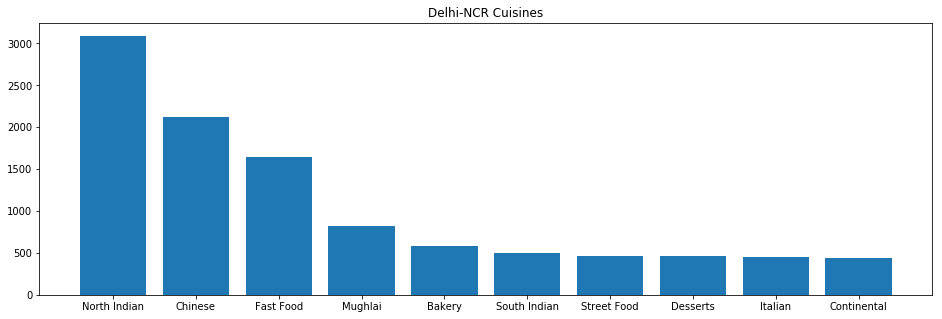

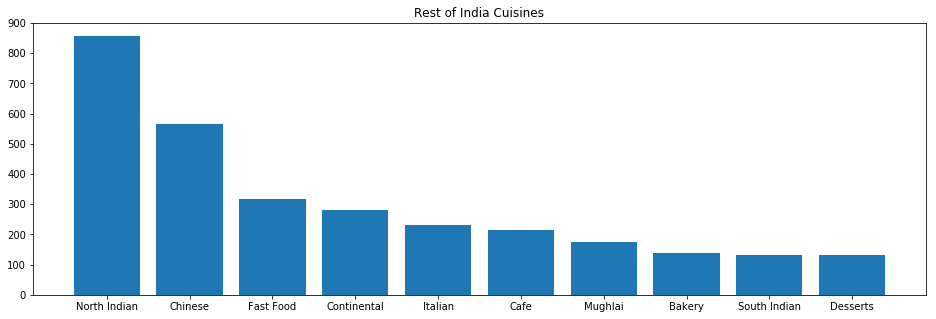

In [147]:
## Question 1c)
delhi_ncr_cuisine={}
rest_of_india_cuisine={}
for i in zomato_seperate_data[zomato_seperate_data['separateCity']=='Delhi-NCR']['Cuisines'].values:
    cuisine_list=i.split(',')
    for j in cuisine_list:
        if j.strip() in delhi_ncr_cuisine.keys():
            delhi_ncr_cuisine[j.strip()]=delhi_ncr_cuisine.get(j.strip())+1;
        else:
            delhi_ncr_cuisine[j.strip()]=1
for i in zomato_seperate_data[zomato_seperate_data['separateCity']=='Rest of India']['Cuisines'].values:
    cuisine_list=i.split(',')
    for j in cuisine_list:
        if j.strip() in rest_of_india_cuisine.keys():
            rest_of_india_cuisine[j.strip()]=rest_of_india_cuisine.get(j.strip())+1;
        else:
            rest_of_india_cuisine[j.strip()]=1  
top_delhi_10=pd.DataFrame(data=list(zip(list(delhi_ncr_cuisine.keys()),list(delhi_ncr_cuisine.values())))).sort_values(by=1,ascending=False)
top_rest_10=pd.DataFrame(data=list(zip(list(rest_of_india_cuisine.keys()),list(rest_of_india_cuisine.values())))).sort_values(by=1,ascending=False)   
x_delhi=top_delhi_10[0].values[0:10]
y_delhi=top_delhi_10[1].values[0:10]
plt.rcParams["figure.figsize"] = (16,5)
plt.bar(x_delhi,y_delhi,)
plt.title("Delhi-NCR Cuisines")
plt.show()
x_rest=top_rest_10[0].values[0:10]
y_rest=top_rest_10[1].values[0:10]
plt.bar(x_rest,y_rest)
plt.title("Rest of India Cuisines")
plt.show()

## Question 1d

----Top Cuisines----


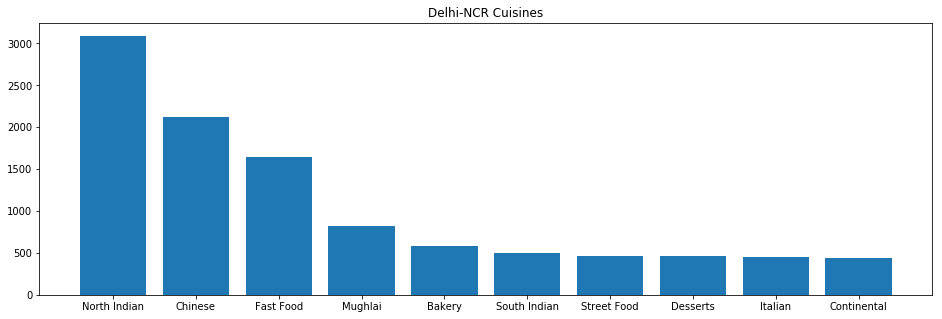

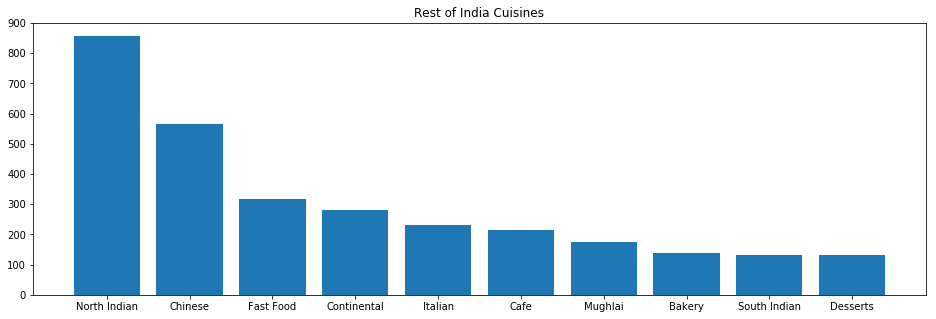

From this graph we can see the cuisines Street Food is quite famous in New Delhi compared to rest of India.
Mughlai is quite famous cuisines in Delhi-NCR compared to rest of India.
Bakery, which is the fifth most abundant cuisine in Delhi-NCR drops further below to the seventh position in the Rest of India.
Cafe gets a similar treatment where it is at an eight in Rest of India but drops to the ninth spot in Delhi-NCR.
South Indian, which is at the sixth in Delhi-NCR falls to the last of the top 9 in Rest of India.


In [157]:
print("----Top Cuisines----")
x_delhi=top_delhi_10[0].values[0:10]
y_delhi=top_delhi_10[1].values[0:10]
plt.rcParams["figure.figsize"] = (16,5)
plt.bar(x_delhi,y_delhi,)
plt.title("Delhi-NCR Cuisines")
plt.show()
x_rest=top_rest_10[0].values[0:10]
y_rest=top_rest_10[1].values[0:10]
plt.bar(x_rest,y_rest)
plt.title("Rest of India Cuisines")
plt.show()
print('From this graph we can see the cuisines Street Food is quite famous in New Delhi compared to rest of India.')
print("Mughlai is quite famous cuisines in Delhi-NCR compared to rest of India.")
print("Bakery, which is the fifth most abundant cuisine in Delhi-NCR drops further below to the seventh position in the Rest of India.")
print("Cafe gets a similar treatment where it is at an eight in Rest of India but drops to the ninth spot in Delhi-NCR.")
print("South Indian, which is at the sixth in Delhi-NCR falls to the last of the top 9 in Rest of India.")

----Bottom Cuisines-----


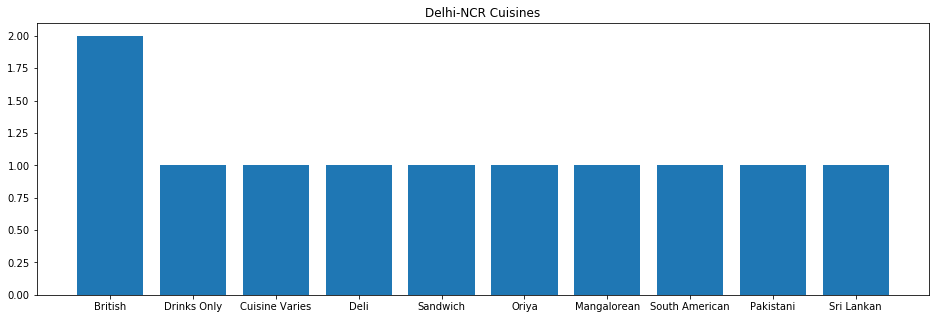

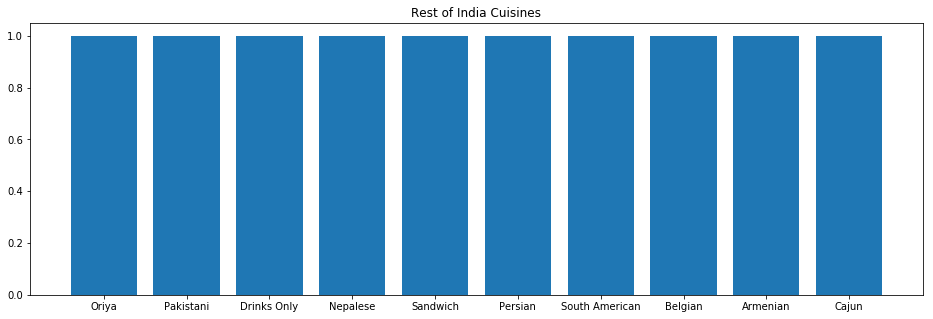

The bottom 9 cuisines in Delhi-NCR have nothing in common with the bottom 9 cuisines in Rest of India. 
This indicates extremely different preferences in one concentrated area when compared to the overall country.
Each of the bottom cuisines have equal frequencies which explains why their graphs look the way they do. 
Most of these are just 1 restaurant in the subset of the data serving these cuisines.


In [169]:
print("----Bottom Cuisines-----")
len_delhi=len(top_delhi_10[0].values)
len_rest=len(top_rest_10[0].values)
x_delhi=top_delhi_10[0].values[len_delhi-10:len_delhi]
y_delhi=top_delhi_10[1].values[len_delhi-10:len_delhi]
plt.rcParams["figure.figsize"] = (16,5)
plt.bar(x_delhi,y_delhi,)
plt.title("Delhi-NCR Cuisines")
plt.show()
x_rest=top_rest_10[0].values[len_rest-10:len_rest]
y_rest=top_rest_10[1].values[len_rest-10:len_rest]
plt.bar(x_rest,y_rest)
plt.title("Rest of India Cuisines")
plt.show()
print('The bottom 9 cuisines in Delhi-NCR have nothing in common with the bottom 9 cuisines in Rest of India. ')
print("This indicates extremely different preferences in one concentrated area when compared to the overall country.")
print("Each of the bottom cuisines have equal frequencies which explains why their graphs look the way they do. ")
print("Most of these are just 1 restaurant in the subset of the data serving these cuisines.")

In [171]:
print('Concluding Cuisines')

print('-->If Number of Restaurants are considered, then:')
print()
print('---->Overall')

print('-->Top 9 Cuisines : North Indian, Chinese, Fast Food, Mughlai, Bakery, Continental, Italian, South Indian, Cafe')

print('-->Bottom 9 Cuisines : Drinks Only, Sri Lankan, Persian, Malwani, Deli, Cuisine Varies, Cajun, Belgian, BBQ')
print()
print('---->Delhi-NCR')

print('-->Top 9 Cuisines : North Indian, Chinese, Fast Food, Mughlai, Bakery, South Indian, Street Food, Desserts')

print('-->Bottom 9 Cuisines : African, Andhra, Arabian, Armenian, Awadhi, Bihari, Burmese, Gujarati, Indonesian')
print()
print('---->Rest of India')

print('-->Top 9 Cuisines : North Indian, Chinese, Fast Food, Mughlai, Continental, Italian, Bakery, Cafe, South Indian')

print('-->Bottom 9 Cuisines : Oriya, Pakistani, Drinks Only, Malwani, Nepalese, Sandwich, Cajun, Belgian, Persian')
print()
print('Cuisine Not Present')
print('From above result cuisines like Charcoal Grill,Cajun,Persian and Malwani not present in Delhi NCR but present in Rest of India.')

Concluding Cuisines
-->If Number of Restaurants are considered, then:

---->Overall
-->Top 9 Cuisines : North Indian, Chinese, Fast Food, Mughlai, Bakery, Continental, Italian, South Indian, Cafe
-->Bottom 9 Cuisines : Drinks Only, Sri Lankan, Persian, Malwani, Deli, Cuisine Varies, Cajun, Belgian, BBQ

---->Delhi-NCR
-->Top 9 Cuisines : North Indian, Chinese, Fast Food, Mughlai, Bakery, South Indian, Street Food, Desserts
-->Bottom 9 Cuisines : African, Andhra, Arabian, Armenian, Awadhi, Bihari, Burmese, Gujarati, Indonesian

---->Rest of India
-->Top 9 Cuisines : North Indian, Chinese, Fast Food, Mughlai, Continental, Italian, Bakery, Cafe, South Indian
-->Bottom 9 Cuisines : Oriya, Pakistani, Drinks Only, Malwani, Nepalese, Sandwich, Cajun, Belgian, Persian

Cuisine Not Present
From above result cuisines like Charcoal Grill,Cajun,Persian and Malwani not present in Delhi NCR but present in Rest of India.


# Question 2

In [180]:
zomato_data['Aggregate rating']

(9551,)

## Question 2a i)

In [ ]:
## Number of Votes given Restaurant

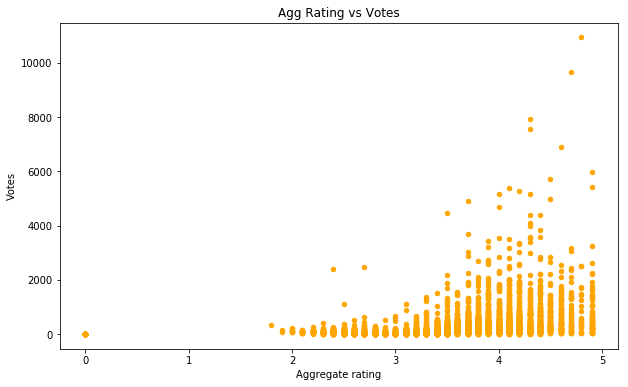

In general trend more number of votes signify restaturant provide good serivice
From the graph we can see that if Number of votes is greater than 4500 then restaurant rating lie between 3.5-5.0
If Number of Votes is greater tahn 6000 then restaurant rating lie between 4.3-5
More number of votes means more rating


In [192]:
zomato_data.plot.scatter(x='Aggregate rating',y='Votes',figsize=(10,6), color='orange', title="Agg Rating vs Votes")
plt.show()
print('In general trend more number of votes signify restaturant provide good serivice')
print('From the graph we can see that if Number of votes is greater than 4500 then restaurant rating lie between 3.5-5.0')
print('If Number of Votes is greater tahn 6000 then restaurant rating lie between 4.3-5')
print("More number of votes means more rating")

## Question 2a ii)

In [228]:
zomato_data_rating=zomato_data.copy()
zomato_data_rating.dropna(inplace=True)
def getNoCuisine(cuisine):
    
    cuisine_list=cuisine.split(',')
    return len(cuisine_list)
zomato_data_rating['Number_Cuisines']=zomato_data_rating['Cuisines'].apply(getNoCuisine)

In [219]:
zomato_data_rating['Number_Cuisines'].value_counts()

2    3444
1    3394
3    1840
4     584
5     164
6      74
7      28
8      14
Name: Number_Cuisines, dtype: int64

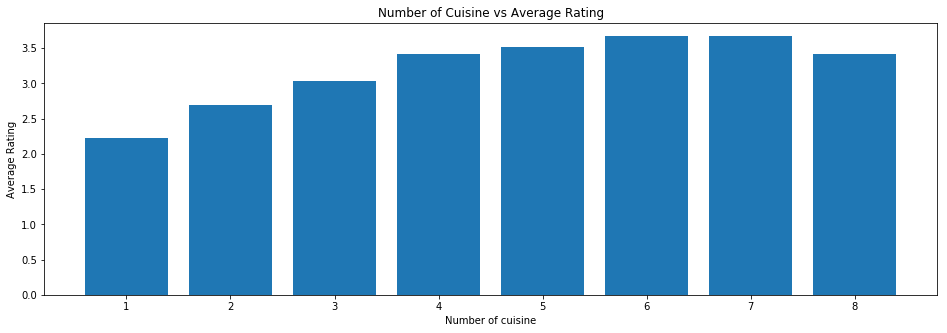

More Number of Cusine, Higer Rate Restaruant.


In [221]:
num_cuisine=np.arange(1,9)
average_rating=[]
for i in num_cuisine:
    average_rating.append(zomato_data_rating[zomato_data_rating['Number_Cuisines']==i]['Aggregate rating'].mean())
plt.bar(num_cuisine,average_rating)
plt.xlabel("Number of cuisine")
plt.ylabel("Average Rating")
plt.title("Number of Cuisine vs Average Rating")
plt.show()
print("More Number of Cusine, Higer Rate Restaruant.")

## Question 2 a iii)

In [229]:
zomato_data_rating.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Number_Cuisines'],
      dtype='object')

In [246]:
zomato_india=zomato_data[zomato_data['Country Code']==1]

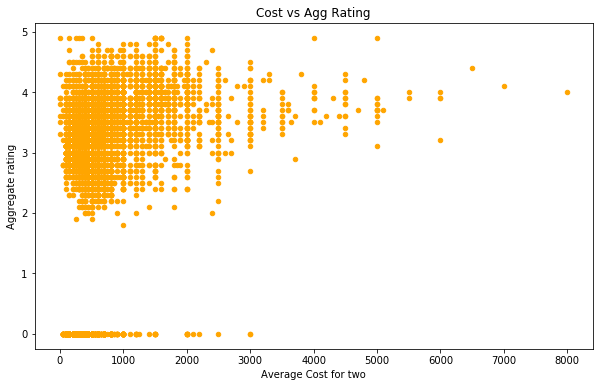

From the above graph, we can see that most of the data is clustered around cost upto 2000 and rating values from 2 to 4.5 approximately. There are few restaurants with cost range between 2500 to 6000.
There are some outliers in the data where cost is listed as 0 because it might not be captured for those restaurants


In [247]:
zomato_india.plot.scatter(x='Average Cost for two',y='Aggregate rating',figsize=(10,6), color='orange', title="Cost vs Agg Rating")
plt.show()
print('From the above graph, we can see that most of the data is clustered around cost upto 2000 and rating values from 2 to 4.5 approximately. There are few restaurants with cost range between 2500 to 6000.')
print('There are some outliers in the data where cost is listed as 0 because it might not be captured for those restaurants')

 A more concise and detailed view of above data can be via hex plot as shown below.


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


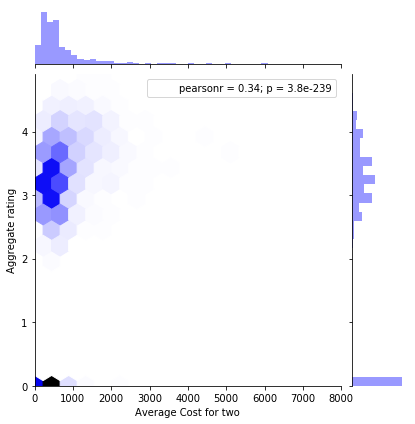

In above graph, we can see more clearly that the maximum number of rating values are around 3 to 3.5 and the Avg cost for two, for maximum data is also up to 1000.


In [251]:
print(' A more concise and detailed view of above data can be via hex plot as shown below.')
sns.jointplot(x='Average Cost for two',y='Aggregate rating',kind ='hex',gridsize=18,data =zomato_india,color='blue')
plt.show()
print('In above graph, we can see more clearly that the maximum number of rating values are around 3 to 3.5 and the Avg cost for two, for maximum data is also up to 1000.')

## Question 2 a iv)

In [264]:
zomato_data.dropna(inplace=True)
print('Lets take out average rating of  cuisines served in number of restaurant > 250 that present in our dataset')
cuisine_dict={}
for i in zomato_data['Cuisines'].values:
    cuisine_list=i.split(',')
    for j in cuisine_list:
        if j.strip() in cuisine_dict.keys():
            cuisine_dict[j.strip()]=cuisine_dict.get(j.strip())+1;
        else:
            cuisine_dict[j.strip()]=1          

Lets take out average rating of  cuisines served in number of restaurant > 250 that present in our dataset


In [265]:
top_cuisine_10=pd.DataFrame(data=list(zip(list(cuisine_dict.keys()),list(cuisine_dict.values())))).sort_values(by=1,ascending=False)
y=top_cuisine_10[1].values
index=0
for j in range(len(y)):
    if y[j]<250:
        index=j-1
        break;
cuisine_list=top_cuisine_10[0].values[0:index]
print(cuisine_list)

['North Indian' 'Chinese' 'Fast Food' 'Mughlai' 'Italian' 'Bakery'
 'Continental' 'Cafe' 'Desserts' 'South Indian' 'Street Food' 'American'
 'Pizza' 'Mithai']


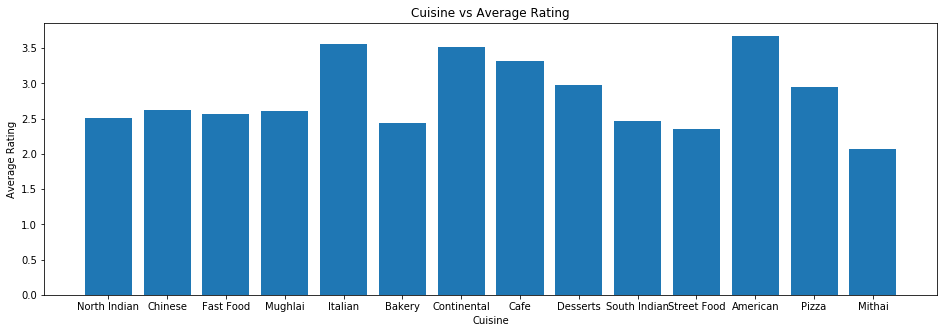

From above graph we can see restaturant serving Cuisine 'Italian','Continental','American' have more average rating compared to other cuisine 


In [276]:
data=list(zip(zomato_data['Cuisines'],zomato_data['Aggregate rating']))
average_rating=[]
for cuisine in cuisine_list:
    sum=0;
    count=0
    for i in range(len(data)):
        if cuisine in data[i][0]:
            sum=sum+data[i][1]
            count=count+1
    average_rating.append(sum/count)     
plt.bar(cuisine_list,average_rating)
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.title("Cuisine vs Average Rating")
plt.show()
print("From above graph we can see restaturant serving Cuisine 'Italian','Continental','American' have more average rating compared to other cuisine ")    

# Question 2 b)

In [ ]:
#Find the weighted restaurant rating of each locality and 
#find out the top 10 localities with more weighted restaurant rating?
#Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

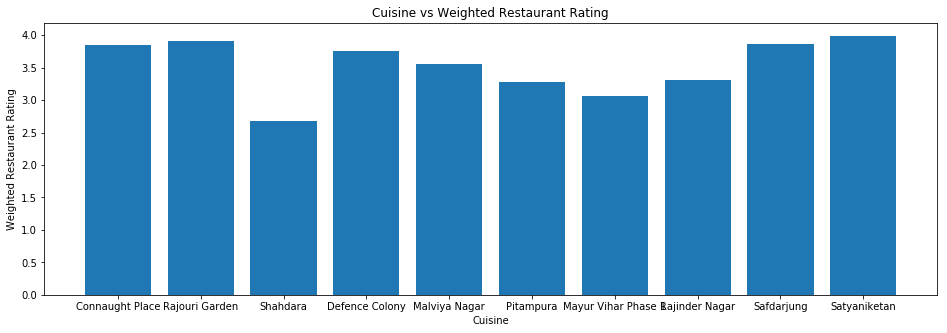

In [308]:
data=list(zip(zomato_data['Locality'],zomato_data['Aggregate rating'],zomato_data['Votes']))
index=0
values=zomato_data['Locality'].value_counts().values
for i in range(len(values)):
    if values[i]<50:
        index=i-1
        break
locality_list=zomato_data['Locality'].value_counts().index[0:index]
weightage_rating=[]
for locality in locality_list:
    NRate=0
    Tvote=0
    for i in range(len(data)):
        if locality in data[i][0]:
            NRate=NRate+(data[i][1]*data[i][2])
            Tvote=Tvote+data[i][2]
    if Tvote!=0:       
        weightage_rating.append(NRate/Tvote) 
    else:
        weightage_rating.append(0)
plt.bar(locality_list[0:10],weightage_rating[0:10])
plt.xlabel("Cuisine")
plt.ylabel("Weighted Restaurant Rating")
plt.title("Cuisine vs Weighted Restaurant Rating")
plt.show()        

# Question3

## Question 3a)

In [309]:
zomato_data=pd.read_csv('zomato.csv',encoding="ISO-8859-1")

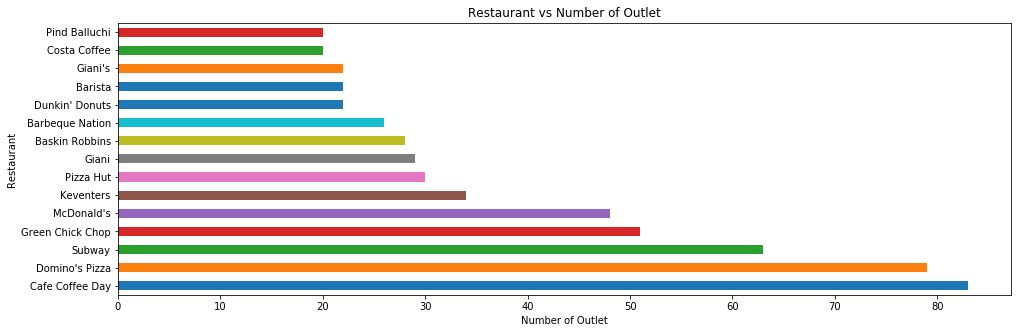

In [313]:
zomato_data['Restaurant Name'].value_counts()[0:15].plot('barh')
plt.xlabel("Number of Outlet")
plt.ylabel("Restaurant")
plt.title("Restaurant vs Number of Outlet")
plt.show()

## Question 3b) 

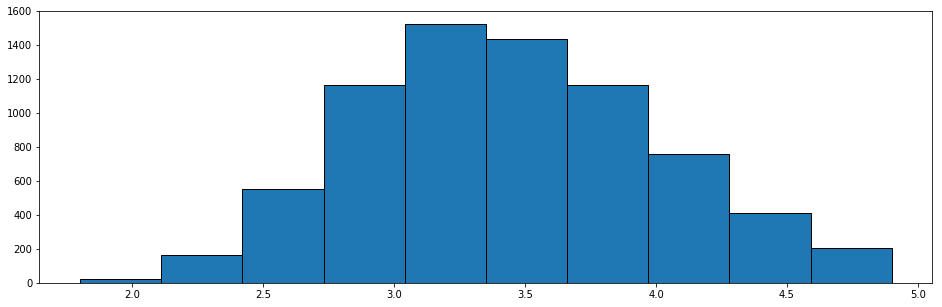

In [321]:
zomato_rated=zomato_data[zomato_data['Aggregate rating']!=0]
plt.hist(zomato_rated['Aggregate rating'].values,bins=10,edgecolor='black')
plt.show()

## Question 3c)

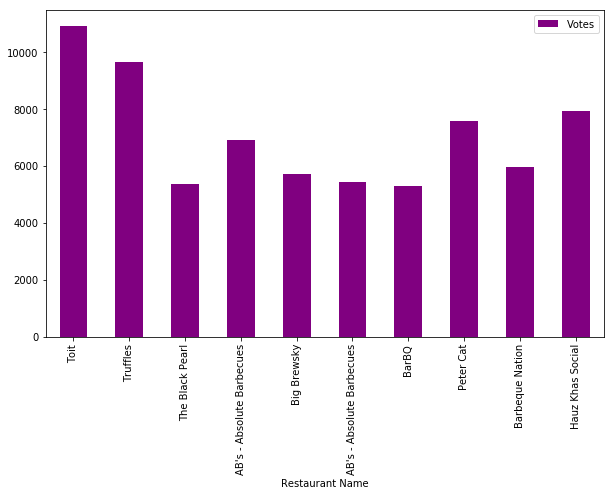

In [324]:
max_votes =zomato_data.Votes.sort_values(ascending=False).head(10)
zomato_data.loc[zomato_data['Votes'].isin(max_votes)][['Restaurant Name','Votes']]
zomato_data.loc[zomato_data['Votes'].isin(max_votes)][['Restaurant Name','Votes']].plot.bar(x='Restaurant Name', y='Votes',
                                                                                  figsize = (10,6), color='purple')
plt.show()

## Question 3d)

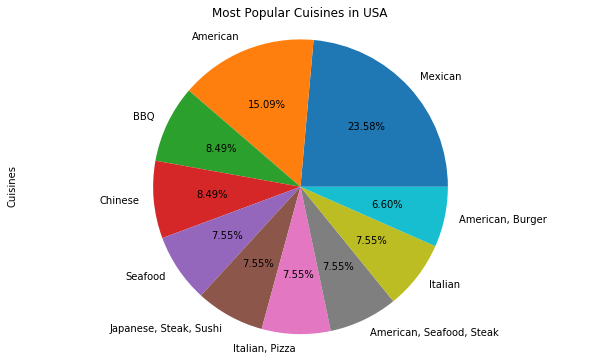

In [327]:
#Plot the pie graph of top 10 cuisines present in restaurants in the USA.
zomato_usa=zomato_data[zomato_data['Country Code']==216]
zomato_usa['Cuisines'].value_counts().sort_values(ascending=False).head(10)
zomato_usa['Cuisines'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',figsize=(10,6), 
title="Most Popular Cuisines in USA", autopct='%1.2f%%')
plt.axis('equal')
plt.show()

## Question 3e)

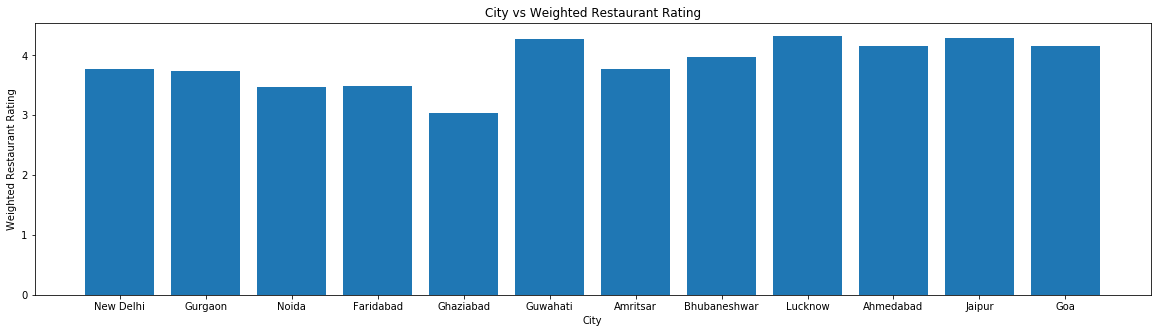

In [351]:
zomato_india=zomato_data[zomato_data['Country Code']==1]
city_list=zomato_india['City'].value_counts().index
data=list(zip(zomato_india['City'],zomato_india['Aggregate rating'],zomato_india['Votes']))
weightage_rating=[]
for city in city_list:
    NRate=0
    Tvote=0
    for i in range(len(data)):
        if city in data[i][0]:
            NRate=NRate+(data[i][1]*data[i][2])
            Tvote=Tvote+data[i][2]
    if Tvote!=0:       
        weightage_rating.append(NRate/Tvote) 
    else:
        weightage_rating.append(0)
plt.rcParams["figure.figsize"] = (20,5)
plt.bar(city_list[0:12],weightage_rating[0:12])
plt.xlabel("City")
plt.ylabel("Weighted Restaurant Rating")
plt.title("City vs Weighted Restaurant Rating")
plt.show()              